In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Basic Graph

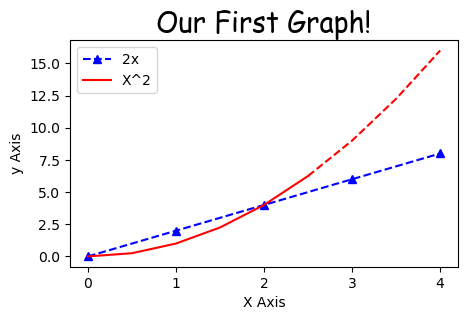

In [40]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

#Resize your Graph(dpi specifies pixels per inch, when saving probably should use 300 if possible)
plt.figure(figsize=(5,3), dpi=100)

#Line 1

#Keyword Argument Notation
# plt.plot(x,y, label='2x', color='red', linewidth=3, linestyle='--', marker='.', markersize='10', markeredgecolor='blue')

# Shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x,y,'b^--',label='2x')

# Line 2

# select interval we want to plot points at
x2 = np.arange(0,4.5,0.5)

#Plot part of the graph as line
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Plot reminder of graph as a dot
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title (specify font parameters with fontdict)
plt.title('Our First Graph!', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

#X and Y Labels
plt.xlabel('X Axis')
plt.ylabel('y Axis')

# X, Y axis  Tickmarks (scale of  your graph)
plt.xticks([0,1,2,3,4])
# plt.yticks([0,2,4,6,8,10])

#  Add a legend
plt.legend()

# Save figure (dpi 300  is good  when  saving  so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()

### Bar Chart

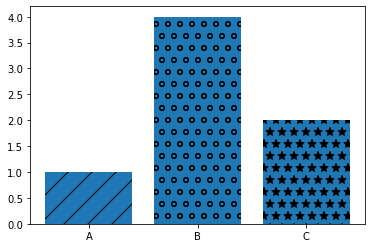

<Figure size 432x288 with 0 Axes>

In [50]:
labels = ['A','B','C']
values  = [1,4,2]

bars = plt.bar(labels, values)

patterns = ['/','o','*']
for bar in bars:
    bar.set_hatch(patterns.pop(0))

# bars[0].set_hatch('/')
# bars[1].set_hatch('o')
# bars[2].set_hatch('*')

plt.figure(figsize=(6,4))

plt.show()

# Real World Examples

#### Line Graph

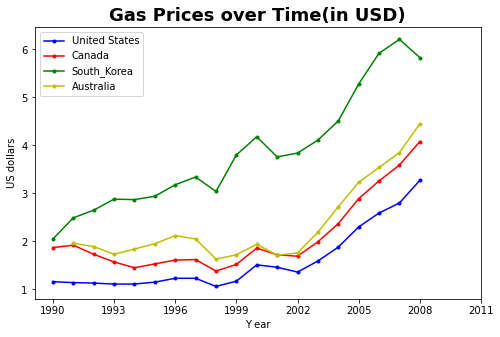

In [99]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8,5))
plt.title('Gas Prices over Time(in USD)', fontdict={'fontweight': 'bold','fontsize':18})

plt.plot(gas.Year, gas.USA, 'b.-',label='United States')
plt.plot(gas.Year, gas.Canada,'r.-', label='Canada')
plt.plot(gas['Year'],  gas['South Korea'],'g.-', label='South_Korea')
plt.plot(gas.Year, gas.Australia,'y.-', label='Australia')

# countries_to_look_at = ['Australia', 'USA', 'Canada', 'South Korea']
# for country in gas:
#     if country in countries_to_look_at:
#         plt.plot(gas.Year, gas[country], marker='.', label=country)

plt.xticks(gas.Year[::3].tolist()+[2011])

plt.xlabel('Y ear')
plt.ylabel('US dollars')
plt.legend()

plt.savefig('gas_price_figure.png', dpi=300)
plt.show()

In [82]:
gas.head(3)

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.0,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.3,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.5,2.65,3.06,1.13


In [19]:
fifa = pd.read_csv('fifa_data.csv')


### Histograms

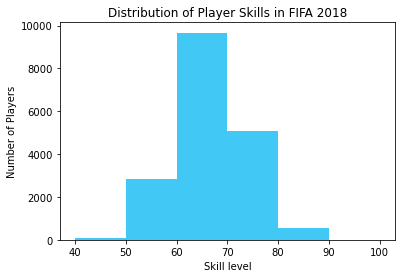

In [109]:
bins = np.arange(40,110,10)

plt.hist(fifa.Overall, bins, color='#42c8f5')

plt.xticks(bins)

plt.ylabel('Number of Players')
plt.xlabel('Skill level')
plt.title('Distribution of Player Skills in FIFA 2018')

plt.yticks()

plt.show()

 #### Pie chart

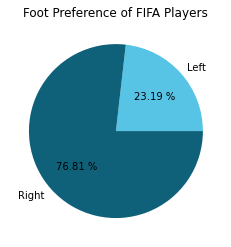

In [170]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

labels = ['Left', 'Right']
colors  = ['#57c4e6', '#0f617a']

plt.pie([left, right], labels=labels, colors=colors, autopct='%.2f %%')
plt.title('Foot Preference of FIFA Players')

plt.show()

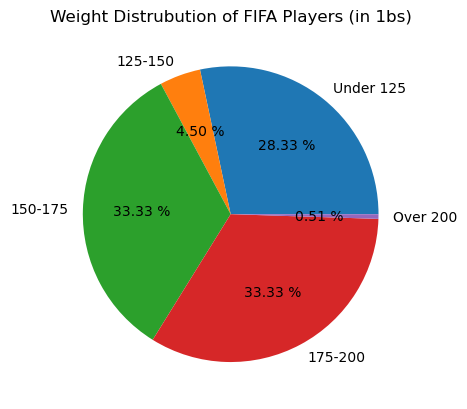

In [62]:
fifa.Weight = [int(x.replace('l', '1').strip('1bs')) if type(x) == str else x for x in fifa.Weight]

plt.style.use('default')

light = fifa.loc[fifa.Weight < 80].count()[0]
light_medium= fifa.loc[(fifa.Weight >= 80) & (fifa.Weight < 150)].count()[0]
medium=fifa[(fifa.Weight) >= 150 & (fifa.Weight < 170)].count()[0]
medium_heavy=fifa[(fifa.Weight) >= 170 & (fifa.Weight < 200)].count()[0]
heavy=fifa[(fifa.Weight >= 200)].count()[0]

weights=[light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', 'Over 200']
explode = (.0,.0,0,0,.0)

plt.title('Weight Distrubution of FIFA Players (in 1bs)')

plt.pie(weights, labels=labels, autopct='%.2f %%', explode=explode)

plt.show()

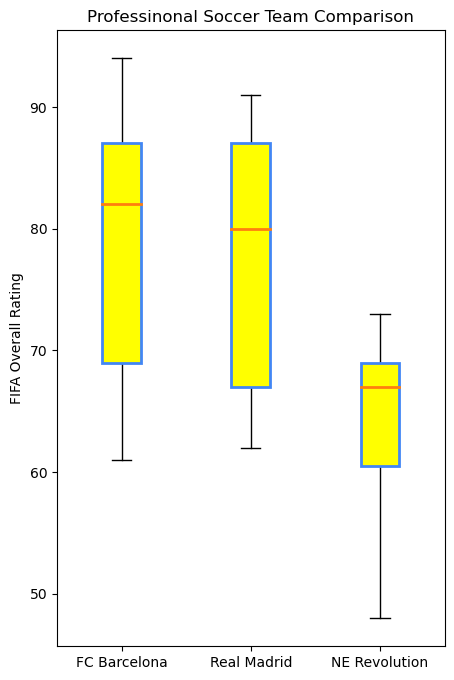

In [85]:
plt.style.use('default')

plt.figure(figsize=(5,8))

barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
rev = fifa.loc[fifa.Club == 'New England Revolution']['Overall']
labels=['FC Barcelona', 'Real Madrid', 'NE Revolution']
boxes = plt.boxplot([barcelona, madrid, rev], labels=labels, patch_artist=True, medianprops={'linewidth': 2})

for box in boxes['boxes']:
    # set edge color
    box.set(color="#4286f4", linewidth=2)

    # Change Fill Color
    box.set(facecolor='yellow')
plt.title('Professinonal Soccer Team Comparison')
plt.ylabel('FIFA Overall Rating')
plt.show()